In [1]:
import pandas as pd;
import matplotlib.pyplot as plt;
import numpy as np;
import seaborn as sns;


In [2]:
data=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv");
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df= pd.DataFrame(data);
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df["TotalCharges"]= df["TotalCharges"].replace (" ",0);
df["TotalCharges"]= df["TotalCharges"].astype("float");

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum().sum()

0

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
df["customerID"].duplicated().sum()

0

# converting value from 0 and 1 to yes or no to make it understand

In [9]:
def conv(value):
    if value==1:
        return "yes"
    else:
        return "no"
df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)

In [10]:
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# churn customers

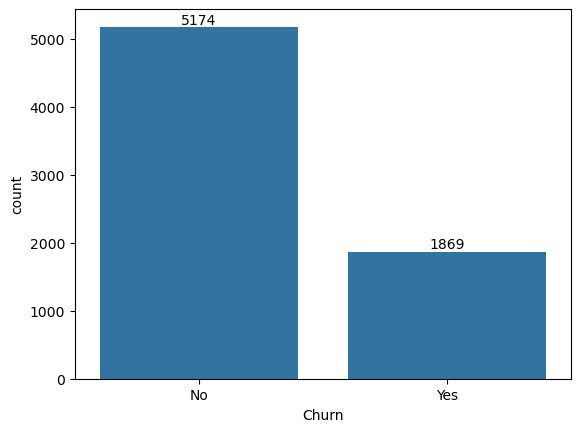

In [12]:
ax= sns.countplot(x= "Churn", data= df)
ax.bar_label(ax.containers[0])
plt.show()

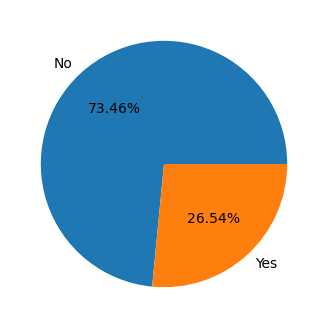

In [22]:
plt.figure(figsize=(4,4))
gb=df.groupby("Churn").agg({'Churn':"count"})
gb
plt.pie(gb["Churn"], labels=gb.index, autopct= "%1.2f%%")
plt.show()

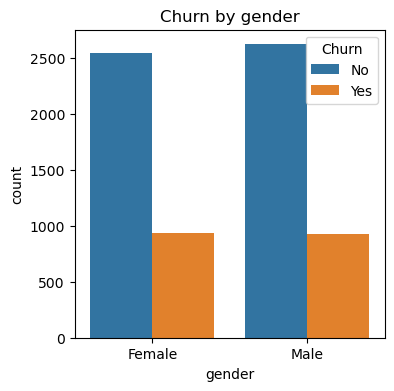

In [23]:
plt.figure(figsize=(4,4))
sns.countplot(x="gender",data=df,hue="Churn");
plt.title("Churn by gender");
plt.show()

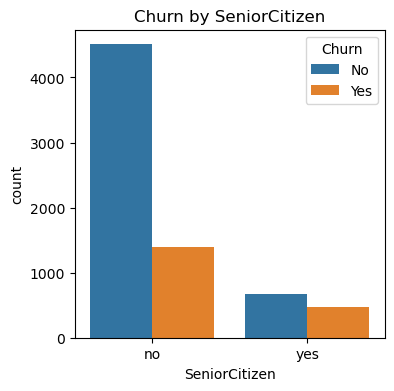

In [24]:
plt.figure(figsize=(4,4))
sns.countplot(x="SeniorCitizen",data=df,hue="Churn");
plt.title("Churn by SeniorCitizen");
plt.show()

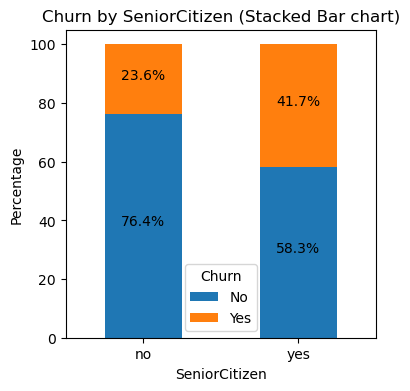

In [25]:
# Assuming df is your DataFrame and it has columns 'SeniorCitizen' and 'Churn'
# First, create a cross-tabulation of the data
cross_tab = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Calculate the percentage for each category
cross_tab_percentage = cross_tab.div(cross_tab.sum(1), axis=0) * 100

# Plotting
ax = cross_tab_percentage.plot(kind='bar', stacked=True, figsize=(4,4))

# Adding labels with percentages
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center')

plt.title("Churn by SeniorCitizen (Stacked Bar chart)")
plt.ylabel('Percentage')
plt.xlabel('SeniorCitizen')
plt.xticks(rotation=0)
plt.show()

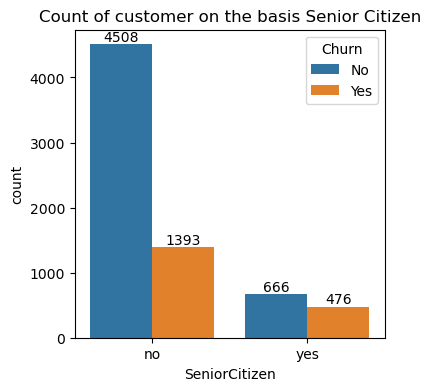

In [26]:
plt.figure(figsize=(4,4))
ax= sns.countplot(x= "SeniorCitizen", data= df,hue="Churn")
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge')  # Format as integers
plt.title("Count of customer on the basis Senior Citizen")
plt.show()

#comparatively a greated percentage of people from the senior citzen category has churned.

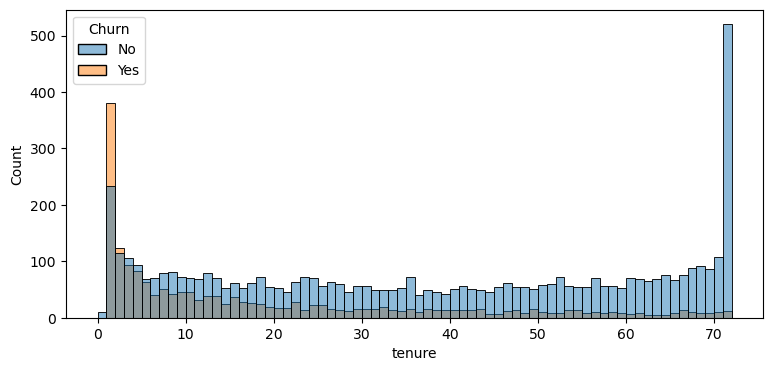

In [27]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure",data=df,bins=72,hue="Churn")
plt.show()

#People who used our services for long time stayed, and the people who used services for 2 months have churned

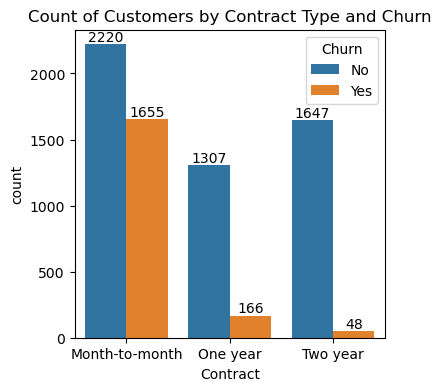

In [28]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x="Contract", data=df, hue="Churn")

# Add custom labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge')  # Format as integers

plt.title("Count of Customers by Contract Type and Churn")
plt.show()

In [ ]:
df.columns.values

In [ ]:
# people who have month to month contract have churned the most and the people who has 2 year contract have churned least

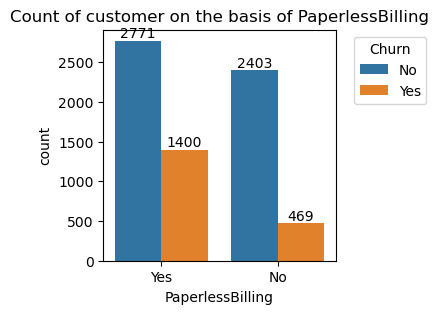

In [29]:
plt.figure(figsize=(3,3))
ax= sns.countplot(x= "PaperlessBilling", data= df,hue="Churn")
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge')  # Format as integers
# Move the legend outside the graph
plt.legend(title="Churn", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Count of customer on the basis of PaperlessBilling")
plt.show()

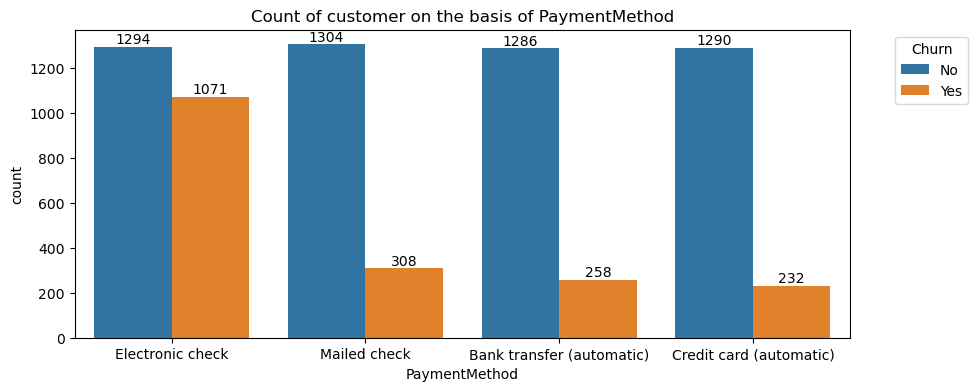

In [30]:
plt.figure(figsize=(10,4))
ax= sns.countplot(x= "PaymentMethod", data= df,hue="Churn")
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge')  # Format as integers
# Move the legend outside the graph
plt.legend(title="Churn", bbox_to_anchor=(1.05, 1), loc='upper left')   
plt.title("Count of customer on the basis of PaymentMethod")
plt.show()

#Customer churn more when they use electronic check as the payment method

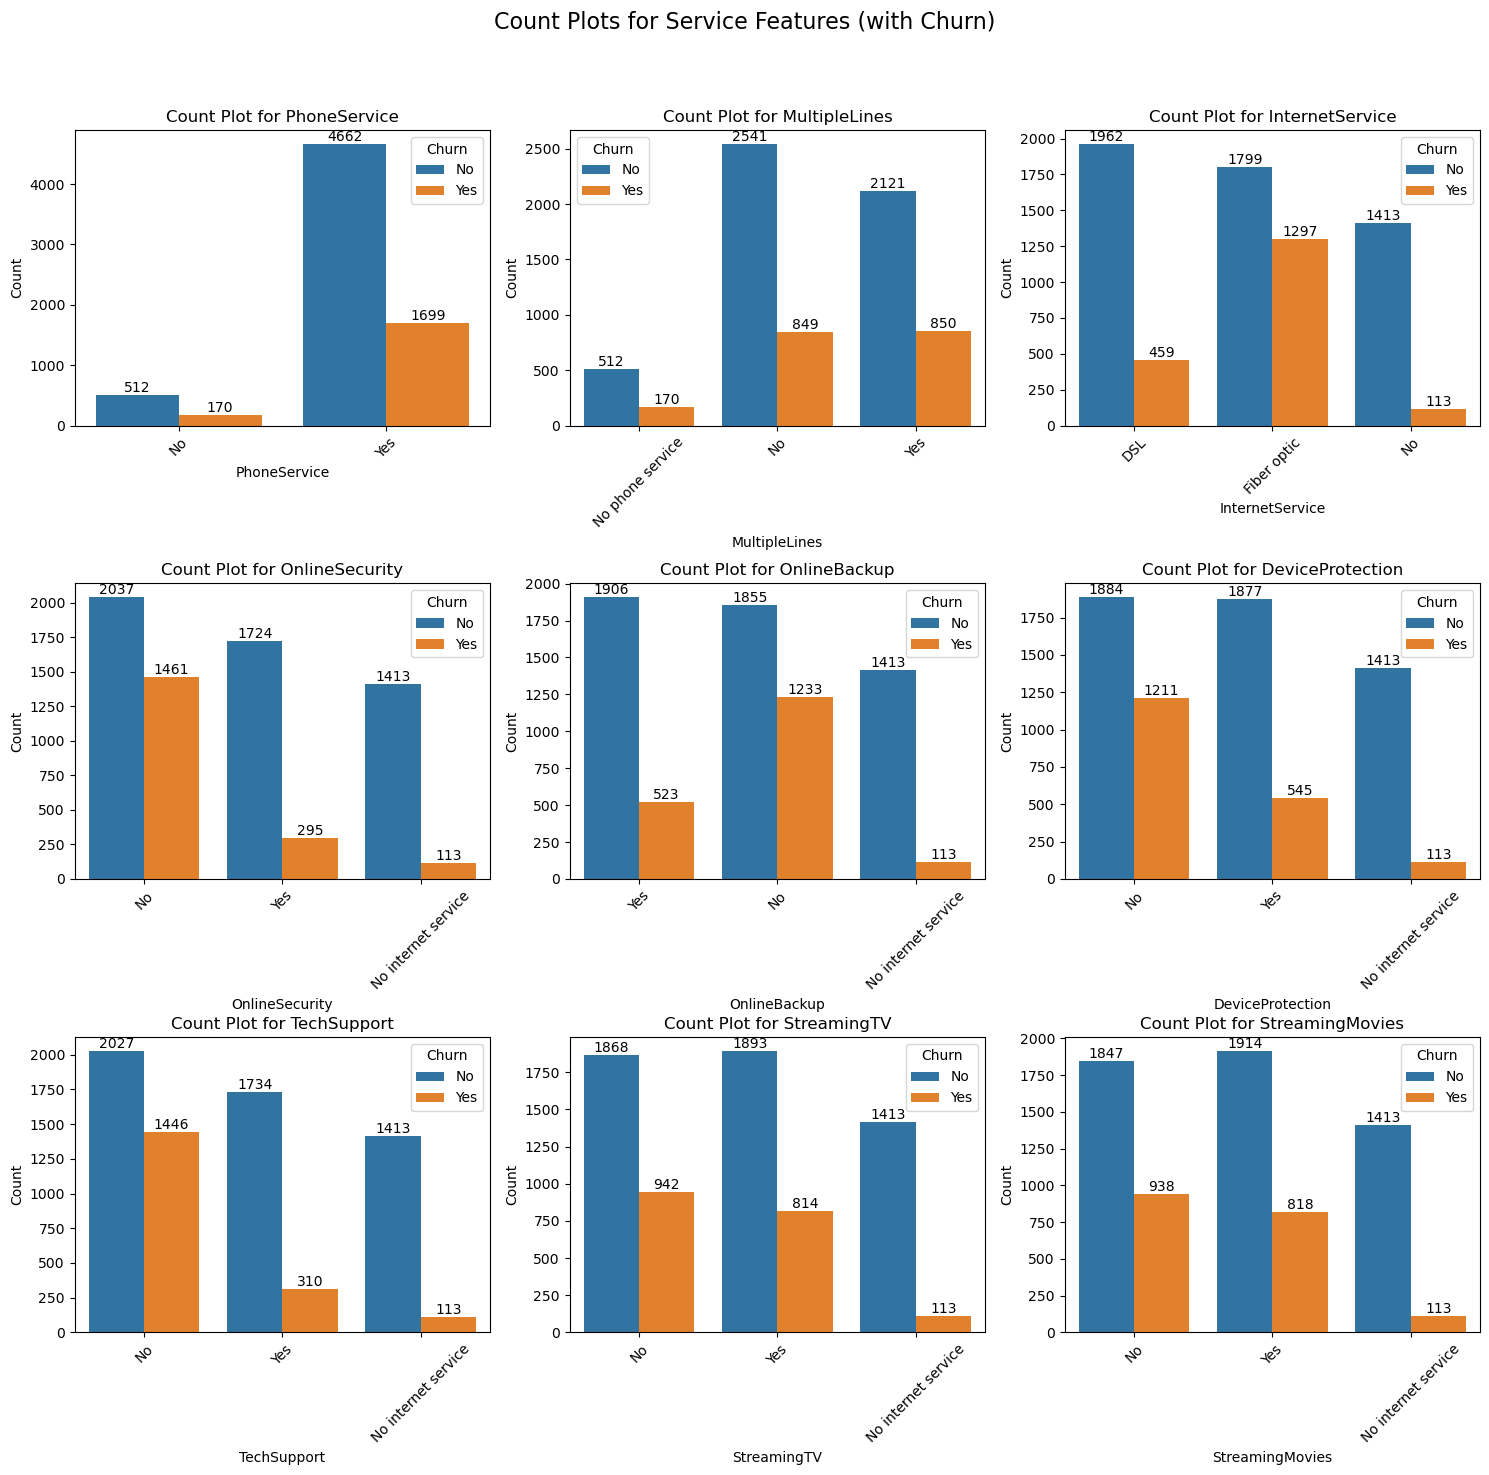

In [31]:

# List of columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Count Plots for Service Features (with Churn)', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create a count plot
for i, column in enumerate(columns):
    # Create the count plot with hue for Churn
    ax = sns.countplot(data=df, x=column, ax=axes[i], hue=df["Churn"])
    
    # Add count values on top of each bar
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', fontsize=10)
    
    # Set titles and labels
    axes[i].set_title(f'Count Plot for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the top spacing for the title
plt.show()

#Customers with Fiber Optic internet service exhibit a higher churn rate compared to DSL or no internet users. Those without additional services like Online Security, Tech Support, or Device Protection are more likely to churn. Streaming services (StreamingTV and StreamingMovies) show mixed trends, with some users churning more frequently. Customers with multiple phone lines have a slightly higher churn rate than those with a single line. Overall, the absence of value-added services and specific internet types significantly impacts churn, highlighting areas for targeted retention strategies.